In [1]:
import math
from math import exp, sqrt, log
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import scipy
import xlsxwriter

from scipy import stats
import pylab
import statsmodels as sm
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson

import sqlite3
from sqlite3 import Error
 
""" create a database connection tool to a SQLite database """
def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()

if __name__ == '__main__':
    create_connection(r"C:\Users\lione\OneDrive\Dokumente\GitHub\AQM\SQL_DB.db")

2.6.0


In [2]:
#Select Statement to import the SQL Data back into Python:   
conn = sqlite3.connect('SQL_DB.db')

c = conn.cursor()
c.execute("SELECT DATE, Indicator, Value_diff FROM MACRO_CLEAN_DIFF")
macro_sql_data_diff=c.fetchall()
macro_clean_sql_diff = pd.DataFrame(macro_sql_data_diff,columns=['DATE', 'Indicator', 'Value_diff'])
macro_clean_sql_diff = macro_clean_sql_diff.set_index('DATE')
macro = macro_clean_sql_diff.pivot(columns='Indicator', values=['Value_diff'])
macro = macro.droplevel(level=0, axis=1)

c.execute("SELECT * FROM FUTURES_CLEAN")
futures_sql_data=c.fetchall()
futures = pd.DataFrame(futures_sql_data,columns=['DATE', 'CLOSE', 'Instrument', 'Return'])
futures = futures.set_index('DATE')
futures = futures.pivot(columns='Instrument', values=['Return']) 
futures = futures.droplevel(level=0, axis=1)

In [3]:
macro.head(5)

Indicator,CHCPIY_DIFF,CHJOB_DIFF,CHPMI_LOG,CNCPI_DIFF,CNPMIB_LOG,EUHICY_DIFF,EUUNR_DIFF,RUCPIY_DIFF,RUUNR_DIFF,USCPI_DIFF,USPMI_LOG,USUNR_DIFF
DATE,,,,,,,,,,,,
2012-01-31,-0.1,0.0,-0.024693,0.4,0.003968,-0.1,0.1,-1.9,0.3,0.3,0.022389,-0.2
2012-02-29,-0.1,0.0,0.004158,-1.3,0.009852,0.0,0.2,-0.5,-0.1,0.2,-0.016745,0.0
2012-03-31,-0.1,0.0,0.048593,0.4,0.040351,0.0,0.1,0.0,0.1,0.2,0.003745,-0.1
2012-04-30,0.0,0.0,-0.084499,-0.2,0.003759,-0.1,0.1,-0.1,-0.7,0.2,0.031281,0.0
2012-05-31,0.0,0.1,-0.015168,-0.4,-0.055945,-0.2,0.1,0.0,-0.4,-0.2,-0.036905,0.0


In [4]:
futures.head(5)

Instrument,CLc1,Cc1,GCc1,LCc1,NGLNMc1,NGc1,OJc1,PAc1,PLc1,SIc1,Wc1
DATE,,,,,,,,,,,
2012-01-31,-0.003548,-0.011669,0.104223,0.015742,0.035098,-0.177449,0.217209,0.045254,0.124642,0.175813,0.020095
2012-02-29,0.083629,0.027018,-0.016185,0.022179,0.054151,0.044156,-0.097193,0.029731,0.064479,0.039819,-0.002631
2012-03-31,-0.038560,-0.019224,-0.024031,-0.058057,0.035080,-0.207404,-0.147004,-0.078729,-0.031720,-0.063076,-0.005283
2012-04-30,0.017798,0.024920,-0.003541,-0.014214,-0.060838,0.072124,-0.155215,0.042856,-0.044050,-0.047622,-0.019871
2012-05-31,-0.192230,-0.173200,-0.062513,-0.013992,-0.069586,0.058228,-0.228750,-0.107767,-0.101703,-0.109752,-0.006194


Normality Test: Jarque Bera

In [5]:
#Jarque Bera Test of the futures:
Results_futures_JB = pd.DataFrame()
for i in range (len(futures.columns)):
    JB = pd.DataFrame()
    JB['Future'] = [futures.columns[i]]
    JB['JB'] = [stats.jarque_bera(futures[futures.columns[i]])]
    Results_futures_JB = Results_futures_JB.append(JB)
Results_futures_JB.set_index('Future', inplace=True)
Results_futures_JB.to_excel('Results\Results_futures_JB.xlsx')
Results_futures_JB

,JB
Future,
CLc1,"(913.5242485536739, 0.0)"
Cc1,"(32.23704413205092, 9.995736760526341e-08)"
GCc1,"(0.014578499597381549, 0.9927372523499332)"
LCc1,"(4.30301206649713, 0.11630886079363212)"
NGLNMc1,"(66.53296046362013, 3.552713678800501e-15)"
NGc1,"(23.68655076200156, 7.186722145058333e-06)"
OJc1,"(0.04262891207113453, 0.9789110916646923)"
PAc1,"(9.689475120302093, 0.00786968250228659)"
PLc1,"(0.6935144559941344, 0.7069769416335927)"


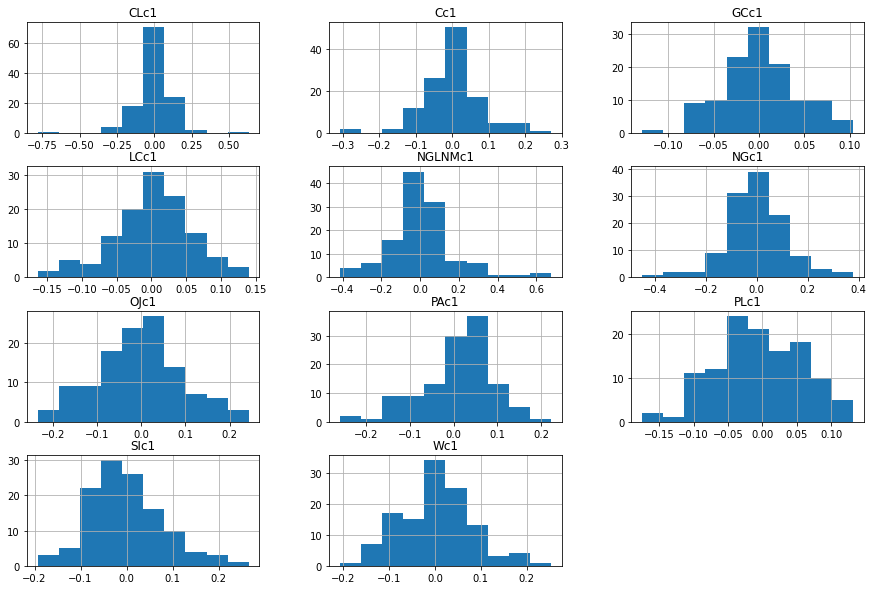

In [6]:
#Histogram of the Commodity Futures Returns:
futures.hist(figsize=(15,10));

In [7]:
Results_macro_JB = pd.DataFrame()
for i in range (len(macro.columns)):
    JB = pd.DataFrame()
    JB['Indicator'] = [macro.columns[i]]
    JB['JB'] = [stats.jarque_bera(macro[macro.columns[i]])]
    Results_macro_JB = Results_macro_JB.append(JB)
Results_macro_JB.set_index('Indicator', inplace=True)
Results_macro_JB.to_excel('Results\Results_macro_JB.xlsx')
Results_macro_JB

,JB
Indicator,
CHCPIY_DIFF,"(0.518448176710372, 0.7716500858693021)"
CHJOB_DIFF,"(1812.3511516402243, 0.0)"
CHPMI_LOG,"(15.351350939854399, 0.0004639770491838835)"
CNCPI_DIFF,"(6.1008027278562285, 0.04733992004130139)"
CNPMIB_LOG,"(13123.542297006847, 0.0)"
EUHICY_DIFF,"(24.992696153119685, 3.740287504716555e-06)"
EUUNR_DIFF,"(53.76823698931334, 2.11042294750996e-12)"
RUCPIY_DIFF,"(440.5059133585973, 0.0)"
RUUNR_DIFF,"(372.4452209618373, 0.0)"


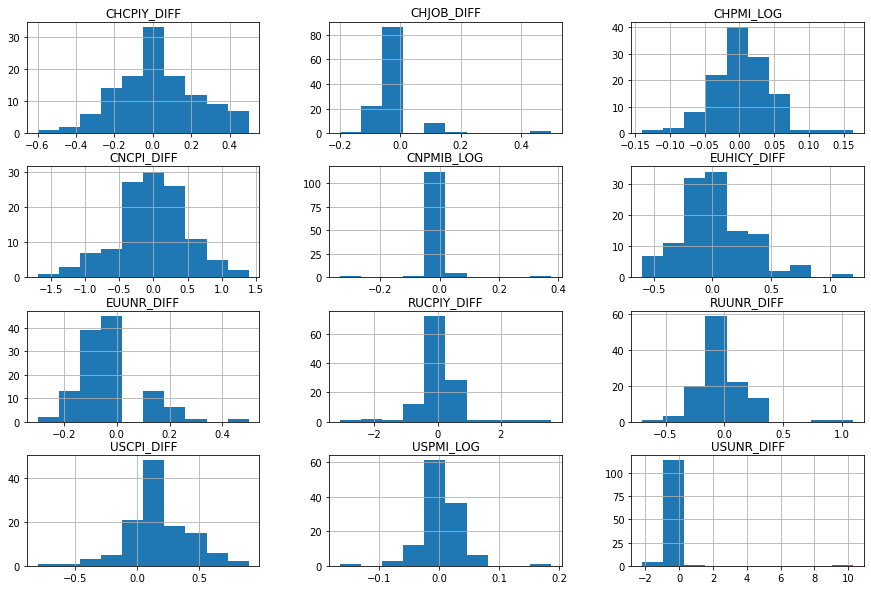

In [8]:
macro.hist(figsize=(15,10));

Correlations:

In [9]:
corr_macro = macro.corr()
corr_macro = corr_macro.style.background_gradient(cmap = "coolwarm")
corr_macro.to_excel('Results\Correlation_Matrix_macro.xlsx')

In [10]:
corr_futures = futures.corr()
corr_futures = corr_futures.style.background_gradient(cmap = "coolwarm")
corr_futures.to_excel('Results\Correlation_Matrix_futures.xlsx')


Stationarity Test

In [11]:
# Stationarity Test
def ADF_test(df):
    adf_res = []
    for cols in df.columns:
        X = np.array(df[cols].values)
        result = adfuller(X)
        adf_res.append({
            'Variable': cols,
            'ADF Stat': result[0],
            'p-value': result[1]
            })
    adf_res = pd.DataFrame(adf_res)
    adf_res.index = adf_res['Variable']
    adf_res.drop(columns = "Variable", inplace = True)
    return adf_res

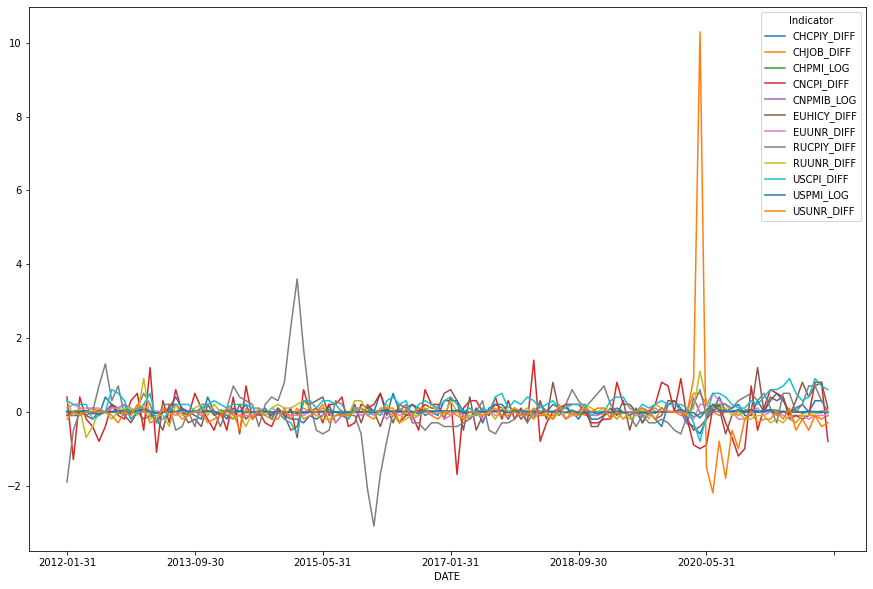

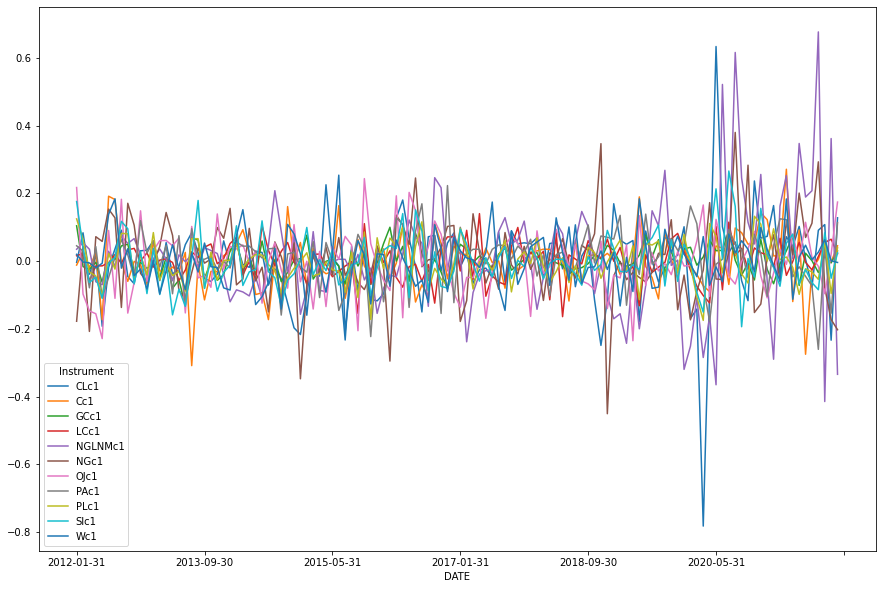

In [12]:
Results_ADF_macro = ADF_test(macro)
macro.plot(figsize=(15,10))
plt.savefig('Grafiken\Makro Line Plot ADF')
Results_ADF_macro.to_excel('Results\ADF Test macro.xlsx')

Results_ADF_future = ADF_test(futures)
futures.plot(figsize=(15,10))
plt.savefig('Grafiken\Futures Line Plot ADF')
Results_ADF_future.to_excel('Results\ADF Test futures.xlsx')

In [13]:
Results_ADF_macro

,ADF Stat,p-value
Variable,,
CHCPIY_DIFF,-3.086078,2.760081e-02
CHJOB_DIFF,-6.062728,1.201790e-07
CHPMI_LOG,-6.672037,4.562111e-09
CNCPI_DIFF,-6.044635,1.320819e-07
CNPMIB_LOG,-7.779337,8.499838e-12
EUHICY_DIFF,-1.742511,4.093535e-01
EUUNR_DIFF,-4.872404,3.945439e-05
RUCPIY_DIFF,-2.919452,4.313231e-02
RUUNR_DIFF,-9.024989,5.641725e-15


In [14]:
Results_ADF_future

,ADF Stat,p-value
Variable,,
CLc1,-8.554770,9.021291e-14
Cc1,-7.135309,3.433303e-10
GCc1,-11.210490,2.131605e-20
LCc1,-5.987174,1.780759e-07
NGLNMc1,-2.063894,2.592786e-01
NGc1,-11.344375,1.035743e-20
OJc1,-13.488058,3.145550e-25
PAc1,-12.638666,1.451054e-23
PLc1,-12.569449,2.019238e-23


OLS

In [15]:
#Code for VIF Calculation - added a Return-Statement, so that the Results get added in a DataFrame:
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    vif_loop_res = pd.DataFrame()
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(formula="y~x", data=x_vars,endog=y, exog=x).fit().rsquared  
        vif=round(1/(1-rsq),2)

        res_temp = pd.DataFrame()
        res_temp['XVAR'] = [xvar_names[i]]
        res_temp['VIF'] = [vif]
        vif_loop_res = vif_loop_res.append(res_temp)
    return vif_loop_res

In [16]:
#VIF Calc: Code for all Columns - Loop:
input_columns = macro[['CHCPIY_DIFF', 'CHJOB_DIFF', 'CHPMI_LOG', 'CNCPI_DIFF', 'CNPMIB_LOG',
       'EUHICY_DIFF', 'EUUNR_DIFF', 'RUCPIY_DIFF', 'RUUNR_DIFF', 'USCPI_DIFF',
       'USPMI_LOG', 'USUNR_DIFF']]
VIF_Results = pd.DataFrame()
for col in range(0, len(input_columns.columns)):
    vif = vif_cal(input_data=input_columns, dependent_col=input_columns.columns[col])
    vif = pd.DataFrame(vif)
    vif['dep_col'] = input_columns.columns[col]
    VIF_Results = VIF_Results.append(vif)
VIF_Results = VIF_Results.set_index(['dep_col']).pivot(columns='XVAR', values=['VIF'])
VIF_Results = VIF_Results.droplevel(level=0, axis=1)
VIF_Results.to_excel('Results\VIF_Results.xlsx')
VIF_Results

XVAR,CHCPIY_DIFF,CHJOB_DIFF,CHPMI_LOG,CNCPI_DIFF,CNPMIB_LOG,EUHICY_DIFF,EUUNR_DIFF,RUCPIY_DIFF,RUUNR_DIFF,USCPI_DIFF,USPMI_LOG,USUNR_DIFF
dep_col,,,,,,,,,,,,
CHCPIY_DIFF,NaN,2.12,1.19,1.18,1.31,1.30,1.27,1.06,1.42,1.58,1.66,2.40
CHJOB_DIFF,1.51,NaN,1.21,1.15,1.09,1.40,1.27,1.07,1.47,1.60,1.65,1.86
CHPMI_LOG,1.60,2.27,NaN,1.18,1.27,1.42,1.29,1.06,1.46,1.60,1.68,2.35
CNCPI_DIFF,1.62,2.21,1.20,NaN,1.33,1.41,1.30,1.05,1.46,1.58,1.63,2.37
CNPMIB_LOG,1.59,1.86,1.15,1.18,NaN,1.42,1.28,1.08,1.46,1.62,1.68,2.30
EUHICY_DIFF,1.49,2.25,1.21,1.18,1.33,NaN,1.29,1.08,1.47,1.50,1.68,2.40
EUUNR_DIFF,1.58,2.22,1.19,1.18,1.31,1.41,NaN,1.08,1.37,1.57,1.61,2.41
RUCPIY_DIFF,1.60,2.26,1.18,1.16,1.33,1.42,1.30,NaN,1.47,1.62,1.68,2.42
RUUNR_DIFF,1.57,2.27,1.20,1.18,1.33,1.42,1.22,1.08,NaN,1.62,1.65,2.11


In [47]:
Results_Breusch_Pagan = pd.DataFrame()
OLS_Results_Bottom = pd.DataFrame()
OLS_Results_Top = pd.DataFrame()

counter = 0
for i in range(len(futures.columns)):
    for k in range(len(macro.columns)):
        y = futures[futures.columns[i]]
        x_variables = macro[macro.columns[k]]
        x = sm.add_constant(x_variables)
        model = sm.OLS(y,x, missing = 'drop') 
        results = model.fit(cov_type='HAC', cov_kwds={'maxlags':1})
        counter += 1
        
        # Breush Pagan Test for Heteroskedastic residuals
        regression1 = pd.DataFrame(y)
        prediction = results.predict()
        regression1['Prediction'] = prediction
        residuals1 = y - prediction
        results_summary  = results.summary()

        pagan = pd.DataFrame()
        name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
        pagan = sms.het_breuschpagan(residuals1, results.model.exog)
        breusch = lzip(name, pagan)
        breusch = pd.DataFrame(breusch)
        breusch['Futures'] = futures.columns[i]
        breusch['coef_var'] = macro.columns[k]
        Results_Breusch_Pagan = Results_Breusch_Pagan.append(breusch)

        #Append Results to the Results-Table:
        results_as_html = results_summary.tables[1].as_html()
        results = pd.read_html(results_as_html, header=0, index_col=0)[0]
        results['Futures'] = futures.columns[i]
        results['coef_var'] = macro.columns[k]
        OLS_Results_Bottom = OLS_Results_Bottom.append(results)
        dfs = {}
        fs = results_summary
        for item in fs.tables[0].data:
            dfs[item[0].strip()] = item[1].strip()
            dfs[item[2].strip()] = item[3].strip()
        for item in fs.tables[2].data:
            dfs[item[0].strip()] = item[1].strip()
            dfs[item[2].strip()] = item[3].strip()
        dfs = pd.Series(dfs)
        dfs = pd.DataFrame(dfs)
        dfs.reset_index()
        dfs['Futures'] = futures.columns[i]
        dfs['coef_var'] = macro.columns[k]
        OLS_Results_Top = OLS_Results_Top.append(dfs)

    #With all 
    y = futures[futures.columns[i]]
    x = macro[macro.columns]
    x = sm.add_constant(x)
    model = sm.OLS(y,x, missing = 'drop') 
    results = model.fit(cov_type='HAC', cov_kwds={'maxlags':1})
    counter += 1

    # Breush Pagan Test for Heteroskedastic residuals
    regression1 = pd.DataFrame(y)
    prediction = results.predict()
    regression1['Prediction'] = prediction
    residuals1 = y - prediction
    results_summary  = results.summary()

    pagan = pd.DataFrame()
    name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
    pagan = sms.het_breuschpagan(residuals1, results.model.exog)
    breusch = lzip(name, pagan)
    breusch = pd.DataFrame(breusch)
    breusch['Futures'] = futures.columns[i]
    breusch['coef_var'] = 'All'
    Results_Breusch_Pagan = Results_Breusch_Pagan.append(breusch)

    #Append OLS Results to the Results-Table:
    results_as_html = results_summary.tables[1].as_html()
    results = pd.read_html(results_as_html, header=0, index_col=0)[0]
    results['Futures'] = futures.columns[i]
    results['coef_var'] = 'All'
    OLS_Results_Bottom = OLS_Results_Bottom.append(results)
    dfs = {}
    fs = results_summary
    for item in fs.tables[0].data:
        dfs[item[0].strip()] = item[1].strip()
        dfs[item[2].strip()] = item[3].strip()
    for item in fs.tables[2].data:
        dfs[item[0].strip()] = item[1].strip()
        dfs[item[2].strip()] = item[3].strip()
    dfs = pd.Series(dfs)
    dfs = pd.DataFrame(dfs)
    dfs.reset_index()
    dfs['Futures'] = futures.columns[i]
    dfs['coef_var'] = 'All'
    OLS_Results_Top = OLS_Results_Top.append(dfs)
    
print(counter)
Results_Breusch_Pagan = Results_Breusch_Pagan.rename(columns={0:'Variable', 1:'Value'})
Results_Breusch_Pagan = Results_Breusch_Pagan.set_index('Variable')
Results_Breusch_Pagan['Combo'] = Results_Breusch_Pagan[['Futures', 'coef_var']].agg(' & '.join, axis=1)
Results_Breusch_Pagan = Results_Breusch_Pagan.drop(columns=['Futures', 'coef_var'])
Results_Breusch_Pagan = Results_Breusch_Pagan.reset_index()
Results_Breusch_Pagan = Results_Breusch_Pagan.set_index('Combo')
Results_Breusch_Pagan = Results_Breusch_Pagan.pivot(columns='Variable', values='Value')
Results_Breusch_Pagan.to_excel('Results\OLS_Results_Breusch_Pagan.xlsx')

OLS_Results_Bottom.to_excel('Results\OLS_Results_Bottom.xlsx')

OLS_Results_Top['Combo'] = OLS_Results_Top[['Futures', 'coef_var']].agg(' & '.join, axis=1)
OLS_Results_Top = OLS_Results_Top.drop(columns=['Futures', 'coef_var'])
OLS_Results_Top = OLS_Results_Top.reset_index()
OLS_Results_Top = OLS_Results_Top.set_index('Combo')
OLS_Results_Top = OLS_Results_Top.pivot(columns='index', values=[0])
OLS_Results_Top = OLS_Results_Top.droplevel(level=0, axis=1)
OLS_Results_Top.to_excel('Results\OLS_Results_Top.xlsx')

143


In [17]:
def OLS_function(y, x_variables):
    x = sm.add_constant(x_variables)
    model = sm.OLS(y,x, missing = 'drop') 
    results = model.fit(cov_type='HAC', cov_kwds={'maxlags':1})
    return results

In [20]:
def breusch_pagan_function(y, results):
    regression1 = pd.DataFrame(y)
    prediction = results.predict()
    regression1['Prediction'] = prediction
    residuals1 = y - prediction
    results_summary  = results.summary()

    pagan = pd.DataFrame()
    name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
    pagan = sms.het_breuschpagan(residuals1, results.model.exog)
    breusch = lzip(name, pagan)
    breusch = pd.DataFrame(breusch)
    return breusch

In [25]:
def OLS_results_extraction(results_summary, ):
    results_as_html = results_summary.tables[1].as_html()
    results = pd.read_html(results_as_html, header=0, index_col=0)[0]
    #results['Futures'] = futures.columns[i]
    #results['coef_var'] = macro.columns[k]
    OLS_Results_Bottom = OLS_Results_Bottom.append(results)
    dfs = {}
    fs = results_summary
    for item in fs.tables[0].data:
        dfs[item[0].strip()] = item[1].strip()
        dfs[item[2].strip()] = item[3].strip()
    for item in fs.tables[2].data:
        dfs[item[0].strip()] = item[1].strip()
        dfs[item[2].strip()] = item[3].strip()
    dfs = pd.Series(dfs)
    dfs = pd.DataFrame(dfs)
    dfs.reset_index()
    return OLS_Results_Bottom
    return dfs

In [29]:
Results_Breusch_Pagan = pd.DataFrame()
OLS_Results_Bottom = pd.DataFrame()
OLS_Results_Top = pd.DataFrame()

counter = 0
for i in range(len(futures.columns)):
    for k in range(len(macro.columns)):
        results = OLS_function(futures[futures.columns[i]], macro[macro.columns[k]])
        y = futures[futures.columns[i]]
        counter += 1
        
        # Breush Pagan Test for Heteroskedastic residuals
        breusch = breusch_pagan_function(y, results)
        print(breusch)
        breusch['Futures'] = futures.columns[i]
        breusch['coef_var'] = macro.columns[k]
        Results_Breusch_Pagan = Results_Breusch_Pagan.append(breusch)

        #Append Results to the Results-Table:
        
        OLS_Results_Top = OLS_Results_Top.append(dfs)

    #With all 
    y = futures[futures.columns[i]]
    
    counter += 1

    # Breush Pagan Test for Heteroskedastic residuals
    regression1 = pd.DataFrame(y)
   
    breusch['coef_var'] = 'All'
    Results_Breusch_Pagan = Results_Breusch_Pagan.append(breusch)

    #Append OLS Results to the Results-Table:
    results_as_html = results_summary.tables[1].as_html()
   
    dfs['Futures'] = futures.columns[i]
    dfs['coef_var'] = 'All'
    OLS_Results_Top = OLS_Results_Top.append(dfs)
    
print(counter)
Results_Breusch_Pagan = Results_Breusch_Pagan.rename(columns={0:'Variable', 1:'Value'})
Results_Breusch_Pagan = Results_Breusch_Pagan.set_index('Variable')
Results_Breusch_Pagan['Combo'] = Results_Breusch_Pagan[['Futures', 'coef_var']].agg(' & '.join, axis=1)
Results_Breusch_Pagan = Results_Breusch_Pagan.drop(columns=['Futures', 'coef_var'])
Results_Breusch_Pagan = Results_Breusch_Pagan.reset_index()
Results_Breusch_Pagan = Results_Breusch_Pagan.set_index('Combo')
Results_Breusch_Pagan = Results_Breusch_Pagan.pivot(columns='Variable', values='Value')
Results_Breusch_Pagan.to_excel('Results\OLS_Results_Breusch_Pagan.xlsx')

OLS_Results_Bottom.to_excel('Results\OLS_Results_Bottom.xlsx')

OLS_Results_Top['Combo'] = OLS_Results_Top[['Futures', 'coef_var']].agg(' & '.join, axis=1)
OLS_Results_Top = OLS_Results_Top.drop(columns=['Futures', 'coef_var'])
OLS_Results_Top = OLS_Results_Top.reset_index()
OLS_Results_Top = OLS_Results_Top.set_index('Combo')
OLS_Results_Top = OLS_Results_Top.pivot(columns='index', values=[0])
OLS_Results_Top = OLS_Results_Top.droplevel(level=0, axis=1)
OLS_Results_Top.to_excel('Results\OLS_Results_Top.xlsx')

TypeError: breusch_pagan_function() takes 0 positional arguments but 2 were given

In [48]:
Results_Breusch_Pagan

Variable,Lagrange multiplier statistic,f p-value,f-value,p-value
Combo,,,,
CLc1 & All,33.007436,3.279602e-04,3.383235,9.654346e-04
CLc1 & CHCPIY_DIFF,6.499440,1.052944e-02,6.757093,1.079085e-02
CLc1 & CHJOB_DIFF,24.662827,1.997114e-07,30.525487,6.828871e-07
CLc1 & CHPMI_LOG,4.516304,3.374293e-02,4.614711,3.357328e-02
CLc1 & CNCPI_DIFF,6.290784,1.188976e-02,6.528165,1.213674e-02
...,...,...,...,...
Wc1 & RUCPIY_DIFF,1.969620,1.631680e-01,1.969113,1.604882e-01
Wc1 & RUUNR_DIFF,2.081431,1.516095e-01,2.082868,1.491003e-01
Wc1 & USCPI_DIFF,0.003729,9.518173e-01,0.003667,9.513087e-01


In [49]:
OLS_Results_Top

index,,AIC:,Adj. R-squared:,BIC:,Cond. No.,Covariance Type:,Date:,Dep. Variable:,Df Model:,Df Residuals:,...,Method:,Model:,No. Observations:,Omnibus:,Prob (F-statistic):,Prob(JB):,Prob(Omnibus):,R-squared:,Skew:,Time:
Combo,,,,,,,,,,,,,,,,,,,,,
CLc1 & All,,-161.4,0.192,-125.2,38.6,HAC,"Wed, 13 Apr 2022",CLc1,12,107,...,Least Squares,OLS,120,32.214,2.33e-06,1.40e-44,0.000,0.273,0.622,06:45:58
CLc1 & CHCPIY_DIFF,,-148.8,0.022,-143.2,5.01,HAC,"Wed, 13 Apr 2022",CLc1,1,118,...,Least Squares,OLS,120,43.229,0.178,4.16e-177,0.000,0.030,-0.499,06:45:58
CLc1 & CHJOB_DIFF,,-152.6,0.053,-147.0,11.7,HAC,"Wed, 13 Apr 2022",CLc1,1,118,...,Least Squares,OLS,120,38.561,0.321,1.74e-124,0.000,0.061,0.432,06:45:58
CLc1 & CHPMI_LOG,,-156.6,0.084,-151.1,24.0,HAC,"Wed, 13 Apr 2022",CLc1,1,118,...,Least Squares,OLS,120,33.168,0.0526,4.55e-87,0.000,0.092,-0.299,06:45:58
CLc1 & CNCPI_DIFF,,-145.4,-0.006,-139.8,1.99,HAC,"Wed, 13 Apr 2022",CLc1,1,118,...,Least Squares,OLS,120,58.291,0.699,6.92e-211,0.000,0.002,-1.080,06:45:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wc1 & RUCPIY_DIFF,,-266.0,-0.008,-260.4,1.44,HAC,"Wed, 13 Apr 2022",Wc1,1,118,...,Least Squares,OLS,120,3.494,0.864,0.230,0.174,0.000,0.296,06:46:02
Wc1 & RUUNR_DIFF,,-266.1,-0.007,-260.5,4.73,HAC,"Wed, 13 Apr 2022",Wc1,1,118,...,Least Squares,OLS,120,3.001,0.626,0.294,0.223,0.001,0.264,06:46:02
Wc1 & USCPI_DIFF,,-266.6,-0.003,-261.1,4.08,HAC,"Wed, 13 Apr 2022",Wc1,1,118,...,Least Squares,OLS,120,3.457,0.323,0.234,0.178,0.006,0.292,06:46:02


In [50]:
OLS_Results_Bottom

,coef,std err,z,P>|z|,[0.025,0.975],Futures,coef_var
const,-0.0043,0.013,-0.328,0.743,-0.030,0.022,CLc1,CHCPIY_DIFF
CHCPIY_DIFF,0.1130,0.083,1.354,0.176,-0.051,0.277,CLc1,CHCPIY_DIFF
const,-0.0035,0.013,-0.270,0.787,-0.029,0.022,CLc1,CHJOB_DIFF
CHJOB_DIFF,-0.3742,0.375,-0.997,0.319,-1.110,0.362,CLc1,CHJOB_DIFF
const,-0.0044,0.012,-0.357,0.721,-0.028,0.020,CLc1,CHPMI_LOG
...,...,...,...,...,...,...,...,...
RUCPIY_DIFF,0.0031,0.011,0.291,0.771,-0.018,0.024,Wc1,All
RUUNR_DIFF,-0.0029,0.031,-0.092,0.926,-0.064,0.059,Wc1,All
USCPI_DIFF,0.0004,0.032,0.011,0.991,-0.063,0.064,Wc1,All
USPMI_LOG,0.0767,0.272,0.282,0.778,-0.457,0.610,Wc1,All


Create a "Master"-Results Table:

In [71]:
Results_Master = pd.DataFrame()
Results_Master['Combo'] = OLS_Results_Top.index
Results_Master = Results_Master.set_index('Combo')
Results_Master['Adj R-squared'] = OLS_Results_Top['Adj. R-squared:'].astype(float)
Results_Master['R-squared'] = OLS_Results_Top['R-squared:'].astype(float)
Results_Master['F-Statistic'] = OLS_Results_Top['F-statistic:'].astype(float)
Results_Master['Prob F-Statistic'] = OLS_Results_Top['Prob (F-statistic):'].astype(float)
Results_Master['Durbin-Watson'] = OLS_Results_Top['Durbin-Watson:'].astype(float)
Results_Master['JB'] = OLS_Results_Top['Jarque-Bera (JB):'].astype(float)
Results_Master['JB Prob'] = OLS_Results_Top['Prob(JB):'].astype(float)

Results_Master = pd.merge(Results_Master,Results_Breusch_Pagan, how='left', on='Combo' )
Results_Master = Results_Master.rename(columns={'Lagrange multiplier statistic': 'Breusch Pagan Statistic', 'p-value':'Breusch P-Value' })
Results_Master = Results_Master.drop(columns=['f p-value','f-value'])
Results_Master[['Breusch Pagan Statistic','Breusch P-Value']].astype(float)
Results_Master.to_excel('Results\Results_Master.xlsx')

Results_Master

,Adj R-squared,R-squared,F-Statistic,Prob F-Statistic,Durbin-Watson,JB,JB Prob,Breusch Pagan Statistic,Breusch P-Value
Combo,,,,,,,,,
CLc1 & All,0.192,0.273,4.87300,0.000002,1.786,201.950,1.400000e-44,33.007436,9.654346e-04
CLc1 & CHCPIY_DIFF,0.022,0.030,1.83500,0.178000,1.829,812.264,4.160000e-177,6.499440,1.079085e-02
CLc1 & CHJOB_DIFF,0.053,0.061,0.99380,0.321000,1.736,569.938,1.740000e-124,24.662827,6.828871e-07
CLc1 & CHPMI_LOG,0.084,0.092,3.83400,0.052600,1.823,397.621,4.550000e-87,4.516304,3.357328e-02
CLc1 & CNCPI_DIFF,-0.006,0.002,0.15020,0.699000,1.688,967.822,6.920000e-211,6.290784,1.213674e-02
...,...,...,...,...,...,...,...,...,...
Wc1 & RUCPIY_DIFF,-0.008,0.000,0.02955,0.864000,2.291,2.940,2.300000e-01,1.969620,1.604882e-01
Wc1 & RUUNR_DIFF,-0.007,0.001,0.23930,0.626000,2.305,2.448,2.940000e-01,2.081431,1.491003e-01
Wc1 & USCPI_DIFF,-0.003,0.006,0.98300,0.323000,2.303,2.907,2.340000e-01,0.003729,9.513087e-01


Save Results in Database:

In [ ]:
conn = sqlite3.connect('SQL_DB.db')
c = conn.cursor()
c.execute('''DROP TABLE IF EXISTS MASTER_RESULTS_OLS;''')

In [74]:
list_sql_master_results = Results_Master.reset_index()
list_sql_master_results = list_sql_master_results.values.tolist()

In [ ]:
c.execute('''CREATE TABLE MASTER_RESULTS_OLS (
    "Combo" TEXT,
	"Adj R-squared" float()
    "" float()
    "Adj R-squared" float()

);''')

In [ ]:
conn = sqlite3.connect(r"C:\Users\lione\OneDrive\Dokumente\GitHub\AQM\SQL_DB.db")
c = conn.cursor()
c.executemany("INSERT INTO MASTER_RESULTS_OLS(Future, JB) VALUES (?,?)", list_sql_master_results)    
conn.commit()